# F1 Telemetry functions

## Exploration

In [1]:
import fastf1

In [2]:
# Load a specific race session
session = fastf1.get_session(2024, 'Brazil', 'R')  # 'R' indicates the race; can also use 'Q', 'FP1', 'FP2', 'FP3'
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (440.49 MB) /home/michail/.cache/fastf1
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status d

In [4]:
dir(session)

['_QUALI_LIKE_SESSIONS',
 '_RACE_LIKE_SESSIONS',
 '_Session__fix_tyre_info',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_first_lap_time_from_ergast',
 '_add_track_status_to_laps',
 '_calculate_quali_like_session_results',
 '_calculate_t0_date',
 '_car_data',
 '_check_lap_accuracy',
 '_drivers_from_f1_api',
 '_drivers_results_from_ergast',
 '_ergast',
 '_fix_missing_laps_retired_on_track',
 '_get_property_warn_not_loaded',
 '_laps',
 '_load_drivers_results',
 '_load_laps_data',
 '_load_race_control_messages',
 '_load_session_info',
 '_load_session_status_data',
 '_load_telemetry',
 '_load_total_lap_count',
 '_load_track_status_data',
 '_load_w

In [8]:
session.track_status.head()

,Time,Status,Message
0,0 days 00:00:00,1,AllClear
1,0 days 00:52:58.758000,2,Yellow
2,0 days 00:58:32.359000,1,AllClear
3,0 days 01:13:10.258000,2,Yellow
4,0 days 01:13:19.484000,1,AllClear


In [9]:
session.total_laps

71

In [10]:
session.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:13:34.222000,VER,1,0 days 00:01:39.161000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.176000,...,True,Red Bull Racing,0 days 01:11:54.770000,2024-11-03 15:49:57.516,12,12.0,False,,False,False
1,0 days 01:15:01.356000,VER,1,0 days 00:01:27.134000,2.0,1.0,NaT,NaT,0 days 00:00:21.981000,0 days 00:00:46.412000,...,True,Red Bull Racing,0 days 01:13:34.222000,2024-11-03 15:51:36.968,1,10.0,False,,False,True
2,0 days 01:16:27.596000,VER,1,0 days 00:01:26.240000,3.0,1.0,NaT,NaT,0 days 00:00:21.716000,0 days 00:00:45.980000,...,True,Red Bull Racing,0 days 01:15:01.356000,2024-11-03 15:53:04.102,1,10.0,False,,False,True
3,0 days 01:17:54.298000,VER,1,0 days 00:01:26.702000,4.0,1.0,NaT,NaT,0 days 00:00:22.151000,0 days 00:00:46.150000,...,True,Red Bull Racing,0 days 01:16:27.596000,2024-11-03 15:54:30.342,12,10.0,False,,False,True
4,0 days 01:19:19.692000,VER,1,0 days 00:01:25.394000,5.0,1.0,NaT,NaT,0 days 00:00:21.773000,0 days 00:00:45.180000,...,True,Red Bull Racing,0 days 01:17:54.298000,2024-11-03 15:55:57.044,1,9.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0 days 03:13:57.033000,PIA,81,0 days 00:01:21.840000,65.0,3.0,NaT,NaT,0 days 00:00:20.784000,0 days 00:00:43.137000,...,False,McLaren,0 days 03:12:35.193000,2024-11-03 17:50:37.939,1,7.0,False,,False,True
1131,0 days 03:15:18.917000,PIA,81,0 days 00:01:21.884000,66.0,3.0,NaT,NaT,0 days 00:00:20.864000,0 days 00:00:43.215000,...,False,McLaren,0 days 03:13:57.033000,2024-11-03 17:51:59.779,1,7.0,False,,False,True
1132,0 days 03:16:41.203000,PIA,81,0 days 00:01:22.286000,67.0,3.0,NaT,NaT,0 days 00:00:21.336000,0 days 00:00:43.159000,...,False,McLaren,0 days 03:15:18.917000,2024-11-03 17:53:21.663,1,7.0,False,,False,True
1133,0 days 03:18:02.922000,PIA,81,0 days 00:01:21.719000,68.0,3.0,NaT,NaT,0 days 00:00:20.873000,0 days 00:00:42.918000,...,False,McLaren,0 days 03:16:41.203000,2024-11-03 17:54:43.949,1,7.0,False,,False,True


In [14]:
len(session.drivers) * session.total_laps # is larger since not all drivers did all laps

1420

In [24]:
laps = session.laps  # Get all laps completed in the session
driver_laps = session.laps.pick_drivers(['VER'])  # Get laps for a specific driver (e.g., 'VER' for Max Verstappen)

In [26]:
driver_laps.tail()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
64,0 days 03:13:25.087000,VER,1,0 days 00:01:20.990000,65.0,2.0,NaT,NaT,0 days 00:00:20.581000,0 days 00:00:42.614000,...,True,Red Bull Racing,0 days 03:12:04.097000,2024-11-03 17:50:06.843,1,1.0,False,,False,True
65,0 days 03:14:46.198000,VER,1,0 days 00:01:21.111000,66.0,2.0,NaT,NaT,0 days 00:00:20.787000,0 days 00:00:42.539000,...,True,Red Bull Racing,0 days 03:13:25.087000,2024-11-03 17:51:27.833,1,1.0,False,,False,True
66,0 days 03:16:06.670000,VER,1,0 days 00:01:20.472000,67.0,2.0,NaT,NaT,0 days 00:00:20.546000,0 days 00:00:42.236000,...,True,Red Bull Racing,0 days 03:14:46.198000,2024-11-03 17:52:48.944,1,1.0,False,,False,True
67,0 days 03:17:28.224000,VER,1,0 days 00:01:21.554000,68.0,2.0,NaT,NaT,0 days 00:00:20.852000,0 days 00:00:42.920000,...,True,Red Bull Racing,0 days 03:16:06.670000,2024-11-03 17:54:09.416,1,1.0,False,,False,True
68,0 days 03:18:49.546000,VER,1,0 days 00:01:21.322000,69.0,2.0,NaT,NaT,0 days 00:00:20.643000,0 days 00:00:42.806000,...,True,Red Bull Racing,0 days 03:17:28.224000,2024-11-03 17:55:30.970,1,1.0,False,,False,True


In [28]:
max(driver_laps['LapNumber']) # completed all laps

69.0

In [29]:
# Get telemetry data for a specific lap
lap = driver_laps.pick_fastest()  # Pick the fastest lap of the driver
telemetry = lap.get_telemetry()  # Get telemetry for that lap

# Access speed, throttle, brake, etc.
speed = telemetry['Speed']
throttle = telemetry['Throttle']
brake = telemetry['Brake']

In [31]:
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-11-03 17:52:48.944,0 days 03:14:46.198000,,NaN,0 days 00:00:00,10889,309,8,100,False,1,interpolation,-0.008468,-0.000002,OnTrack,-3670,-5280,7768
3,2024-11-03 17:52:49.078,0 days 03:14:46.332000,,NaN,0 days 00:00:00.134000,10895,309,8,100,False,1,pos,11.484824,0.002693,OnTrack,-3637,-5416,7773
4,2024-11-03 17:52:49.251,0 days 03:14:46.505000,,NaN,0 days 00:00:00.307000,10908,309,8,100,False,1,car,26.350833,0.006179,OnTrack,-3577,-5652,7781
5,2024-11-03 17:52:49.318,0 days 03:14:46.572000,,NaN,0 days 00:00:00.374000,10913,309,8,100,False,1,pos,32.116572,0.007531,OnTrack,-3557,-5732,7784
6,2024-11-03 17:52:49.491,0 days 03:14:46.745000,,NaN,0 days 00:00:00.547000,10919,310,8,100,False,1,car,47.017500,0.011024,OnTrack,-3525,-5856,7788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2024-11-03 17:54:08.771,0 days 03:16:06.025000,,NaN,0 days 00:01:19.827000,10813,308,8,100,False,1,car,4196.178611,0.983899,OnTrack,-3769,-4891,7757
613,2024-11-03 17:54:08.917,0 days 03:16:06.171000,,NaN,0 days 00:01:19.973000,10836,308,8,100,False,1,pos,4208.695908,0.986834,OnTrack,-3755,-4950,7760
614,2024-11-03 17:54:09.211,0 days 03:16:06.465000,,NaN,0 days 00:01:20.267000,10859,309,8,100,False,1,car,4233.945278,0.992755,OnTrack,-3714,-5111,7763
615,2024-11-03 17:54:09.338,0 days 03:16:06.592000,,NaN,0 days 00:01:20.394000,10849,309,8,100,False,1,pos,4244.848882,0.995311,OnTrack,-3692,-5200,7766


We do not know the brake pressure??

What about the steering angle?

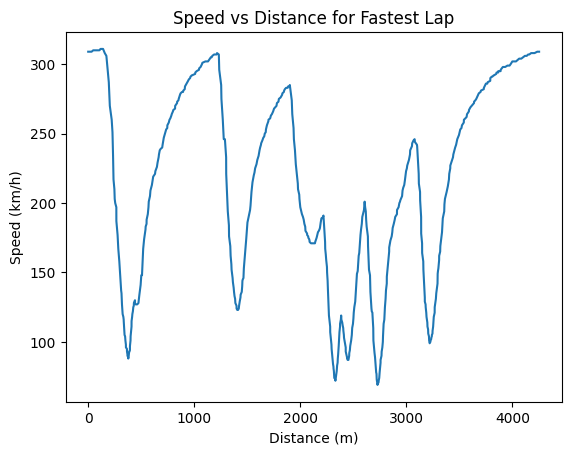

In [43]:
# --Visualisation--

import matplotlib.pyplot as plt

# Plot speed during the fastest lap
plt.plot(telemetry['Distance'], telemetry['Speed'])
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Distance for Fastest Lap')
plt.show()


In [37]:
weather_data = session.weather_data  # Access weather data for the session
weather_data.head()

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:22.903000,22.2,86.0,927.4,True,27.3,0,0.4
1,0 days 00:01:22.903000,22.3,87.0,927.3,True,26.2,191,0.0
2,0 days 00:02:22.903000,22.1,86.0,927.4,True,26.4,182,0.8
3,0 days 00:03:22.906000,22.1,87.0,927.4,True,26.4,210,0.5
4,0 days 00:04:22.910000,22.1,87.0,927.3,True,26.2,0,0.4


In [38]:
drivers = session.drivers  # Get a dictionary of drivers participating in the session
drivers

['1',
 '31',
 '10',
 '63',
 '16',
 '4',
 '22',
 '81',
 '30',
 '44',
 '11',
 '50',
 '77',
 '14',
 '24',
 '55',
 '43',
 '23',
 '18',
 '27']

/home/michail/miniconda3/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
/home/michail/miniconda3/lib/python3.12/site-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


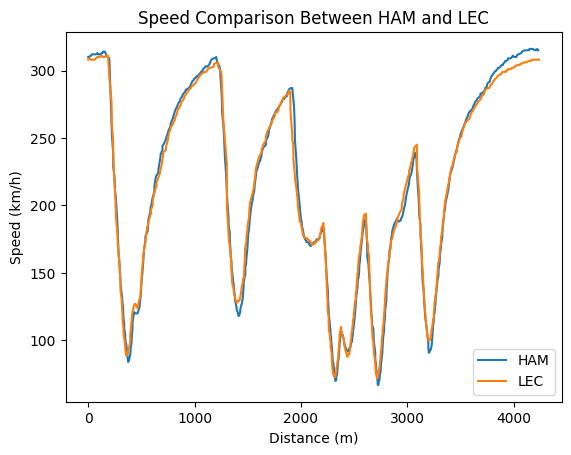

In [39]:
driver1 = session.laps.pick_driver('HAM').pick_fastest()  # Pick fastest lap of driver 1
driver2 = session.laps.pick_driver('LEC').pick_fastest()  # Pick fastest lap of driver 2

# Get telemetry for both drivers
telemetry_driver1 = driver1.get_telemetry()
telemetry_driver2 = driver2.get_telemetry()

# Plot a comparison (e.g., Speed)
plt.plot(telemetry_driver1['Distance'], telemetry_driver1['Speed'], label='HAM')
plt.plot(telemetry_driver2['Distance'], telemetry_driver2['Speed'], label='LEC')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed Comparison Between HAM and LEC')
plt.legend()
plt.show()


In [42]:
results = session.results
results.head()

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,17.0,NaT,NaT,NaT,0 days 02:06:54.430000,Finished,26.0
31,31,E OCON,OCO,ocon,Alpine,0093cc,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:19.477000,Finished,18.0
10,10,P GASLY,GAS,gasly,Alpine,0093cc,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,3.0,3,13.0,NaT,NaT,NaT,0 days 00:00:22.532000,Finished,15.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,GBR,4.0,4,2.0,NaT,NaT,NaT,0 days 00:00:23.265000,Finished,12.0
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,5.0,5,6.0,NaT,NaT,NaT,0 days 00:00:30.177000,Finished,10.0
